MRMR Feature Selection by Maykon Schots & Matheus Rugollo

<h1> Numerical Feature Selection by MRMR </h1>
<hr></hr>

Experimenting fast is key to success in Data Science. When experimenting we're going to bump with huge datasets that require special attention when feature selecting and engineering. In a profit driven context, it's important to quickly test the potential value of an idea rather than exploring the best way to use your data or parametrize a machine learning model. It not only takes time that we usually can't afford but also increase financial costs. 

Herewit we describe an efficient solution to reduce dimensionality of your dataset, by identifying and creating clusters of redundant features and selecting the most relevant one. This has potential to speed up your experimentation process and reduce costs.</p>

<hr></hr>
<h5>Case</h5>
  
You might be wondering how this applies to a real use case and why we had to come up with such technique. Hear this story:
Consider a project in a financial company that we try to understand how likely a client is to buy a product through Machine Learning. Other then profile features, we usually end up with many financial transactions history features of the clients. With that in mind we can assume that probably many of them are highly correlated, e.g in order to buy something of x value, the client probably received a value > x in the past, and since we're going to extract aggregation features from such events we're going to end up with a lot of correlation between them. 


The solution was to come up with an efficient "automatic" way to wipe redundant features from the training set, that can vary from time to time, maintaining our model performance. With this we can always consider at the start of our pipeline all of our "raw" features and select the most relevant of them that are not highly correlated in given moment.

Based on a published [article](https://arxiv.org/abs/1908.05376) we developed an implementation using [feature_engine](https://github.com/feature-engine/feature_engine) and [sklearn](https://scikit-learn.org/stable/). Follow the step-by-step to understand our approach.

<h3> Classification Example </h3>
<hr>

In order to demonstrate, use the [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) helper function from sklearn  to create a set of features making sure that some of them are redundant. Convert both X and y returned by it to be pandas DataFrames for further compatibility with sklearn api.

In [ ]:
import warnings

import pandas as pd
from sklearn.datasets import make_classification

warnings.filterwarnings('ignore')

X, y = make_classification(
    n_samples=5000,
    n_features=30,
    n_redundant=15,
    n_clusters_per_class=1,
    weights=[0.50],
    class_sep=2,
    random_state=42
)

cols = []
for i in range(len(X[0])):
   cols.append(f"feat_{i}")
X = pd.DataFrame(X, columns=cols)
y = pd.DataFrame({"y": y})


In [ ]:
X.head()

Out[32]:

feat_0 
 feat_1 
 feat_2 
 feat_3 
 feat_4 
 feat_5 
 feat_6 
 feat_7 
 feat_8 
 feat_9 
 feat_10 
 feat_11 
 feat_12 
 feat_13 
 feat_14 
 feat_15 
 feat_16 
 feat_17 
 feat_18 
 feat_19 
 feat_20 
 feat_21 
 feat_22 
 feat_23 
 feat_24 
 feat_25 
 feat_26 
 feat_27 
 feat_28 
 feat_29 
 
 
 
 
 0 
 -0.855484 
 0.147268 
 0.931779 
 0.514342 
 -1.160567 
 1.548771 
 -0.814841 
 -0.551259 
 -0.559991 
 -0.588341 
 -0.050275 
 -0.418050 
 -1.883618 
 0.627457 
 -1.430858 
 2.414968 
 0.965552 
 -0.427275 
 1.575164 
 1.386096 
 1.635452 
 0.171738 
 -0.988298 
 2.129211 
 1.502658 
 1.451028 
 -0.159674 
 1.999985 
 -0.088617 
 2.173897 
 
 
 1 
 -0.233143 
 -0.253765 
 0.740147 
 0.816885 
 0.169952 
 1.594853 
 -0.432744 
 -0.118465 
 -0.245680 
 0.318794 
 -0.307883 
 -0.391124 
 1.137396 
 -1.150796 
 -1.642437 
 2.108450 
 1.168464 
 -0.840639 
 1.788039 
 0.134206 
 -0.498645 
 -0.199357 
 -1.260340 
 2.202738 
 1.859376 
 1.392850 
 -0.521572 
 1.733263 
 0.399896 
 2.562269 
 
 
 2 
 -1.004689 
 -2.525201 
 -0.066370 
 1.708870 
 -1.836983 
 -0.200895 
 2.617520 
 0.494441 
 2.118569 
 -1.165920 
 -1.576650 
 0.674405 
 -0.687477 
 0.020001 
 -0.859114 
 -2.652188 
 0.951480 
 0.646614 
 0.821866 
 1.885669 
 -0.361392 
 -2.347812 
 -1.371678 
 -0.213288 
 1.733786 
 -0.814734 
 0.175997 
 -2.276026 
 3.047572 
 -1.306679 
 
 
 3 
 -0.039887 
 -2.002593 
 -0.137059 
 1.352156 
 -0.283016 
 -0.166958 
 2.079097 
 0.316852 
 1.682286 
 0.208227 
 -1.249645 
 -0.460059 
 -0.315972 
 -0.031462 
 -0.673953 
 -2.114534 
 0.749490 
 0.440944 
 0.643708 
 0.300287 
 -1.195257 
 -1.862089 
 -1.082490 
 -0.179667 
 1.366995 
 -0.653095 
 0.799519 
 -1.814268 
 2.416413 
 0.303902 
 
 
 4 
 1.650810 
 0.594325 
 0.268430 
 0.154022 
 -0.626083 
 1.439684 
 -1.215922 
 -1.373762 
 -0.893985 
 0.043517 
 0.242237 
 0.462302 
 -1.067515 
 -0.677758 
 -1.139388 
 2.671788 
 0.701012 
 1.002342 
 1.276911 
 0.194160 
 1.528878 
 0.584114 
 -0.644920 
 1.967760 
 1.044779 
 1.463181 
 0.461469 
 2.227199 
 -0.636540 
 0.948157

<h4>Get Redundant Clusters</h4>
<hr></hr>

Now that we have our master table example set up, we can start by taking advantage of [SmartCorrelatedSelection](https://feature-engine.readthedocs.io/en/1.0.x/selection/SmartCorrelatedSelection.html) implementation by feature_egine. Let's check it's parameters:

<h5>Correlation Threshold </h5>
This can be a hot topic of discussion for each case, in order to keep as much useful data as possible the correlation threshold set was very conservative .97. 
p.s: This demonstration will only have one value set, but a good way of improving this pipeline would be to attempt multiple iterations lowering the threshold, then you could measure performance of given model with different sets of selected features.

<h5>Method</h5>
The best option here was spearman, identifying both linear and non-linear numerical features correlated clusters to make it less redundant as possible through rank correlation threshold.

<h5>Selection Method</h5>
This is not relevant for this implementation, because we're not going to use features selected by the SmartCorrelatedSelection. Use variance , it's faster.


<hr></hr>
<h6>Quick Comment</h6>
You might be wondering why we don't just use feature_engine methods, and we definitely considered and tried it, finally it inspired us to come up with some tweaks for our process. It's a very similar idea, but instead of variance we use mutual information to select one feature out of each cluster, it's also the ground work for optimal parametrization and further development of the pipeline for ad hoc usage.

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection


MODEL_TYPE = "classifier" ## Or "regressor"
CORRELATION_THRESHOLD = .97

# Setup Smart Selector /// Tks feature_engine
feature_selector = SmartCorrelatedSelection(
    variables=None,
    method="spearman",
    threshold=CORRELATION_THRESHOLD,
    missing_values="ignore",
    selection_method="variance",
    estimator=None,
)


feature_selector.fit_transform(X)

### Setup a list of correlated clusters as lists and a list of uncorrelated features
correlated_sets = feature_selector.correlated_feature_sets_

correlated_clusters = [list(feature) for feature in correlated_sets]

correlated_features = [feature for features in correlated_clusters for feature in features]

uncorrelated_features = [feature for feature in X if feature not in correlated_features]


<h4>Wiping Redundancy considering Relevance</h4>

Now we're going to extract the best feature from each correlated cluster using [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) from sklearn.feature_selection. Here we use [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) implementation as our score_func for this classifier example, there are other options like mutual_info_regression be sure to select it according to your use case.

The relevance of each selected feature is considered when we use mutual info of the samples against the target Y, this will be important so we do not lose any predictive power of our features.

<hr></hr>

We end up with a set of selected features that considering our correlation threshold of .97, probably will have similar performance. In a context where you want to prioritize reduction of dimensionality, you can check how the selection will perform to make a good decision about it.

I don't want to believe, I want to know.

In [ ]:
from sklearn.feature_selection import (
    SelectKBest,
    mutual_info_classif,
    mutual_info_regression,
)


mutual_info = {
    "classifier": mutual_info_classif,
    "regressor": mutual_info_regression,
}

top_features_cluster = []
for cluster in correlated_clusters:
            selector = SelectKBest(score_func=mutual_info[MODEL_TYPE], k=1)  # selects the top feature (k=1) regarding target mutual information
            selector = selector.fit(X[cluster], y)
            top_features_cluster.append(
                list(selector.get_feature_names_out())[0]
            )

selected_features = top_features_cluster + uncorrelated_features

<h4>Evaluating the set of features</h4>

Now that we have our set it's time to decide if we're going with it or not. In this demonstration, the idea was to use a GridSearch to find the best hyperparameters for a RandomForestClassifier providing us with the best possible estimator. 

If we attempt to fit many grid searches in a robust way, it would take too long and be very costy. Since we're just experimenting, initally we can use basic cross_validate with the chosen estimator, and we can quickly discard "gone wrong" selections, specially when we lower down our correlation threshold for the clusters.

It's an efficient way to approach experimenation with this method, although I highly recommend going for a more robust evaluation with grid searches or other approaches, and a deep discussion on the impact of the performance threshold for your use cause, sometimes 1% can be a lot of $.

In [ ]:
import os
import multiprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate


cv = StratifiedKFold(shuffle=True, random_state=42)

baseline_raw = cross_validate(
    RandomForestClassifier(
        max_samples=1.0,
        n_jobs=int(os.getenv("N_CORES", 0.50 * multiprocessing.cpu_count())), # simplifica isso aqui pro artigo, bota -1.
        random_state=42
    ),
    X,
    y,
    cv=cv,
    scoring="f1", # or any other metric that you want.
    groups=None
)

baseline_selected_features = cross_validate(
            RandomForestClassifier(),
            X[selected_features],
            y,
            cv=cv,
            scoring="f1",
            groups=None,
            error_score="raise",
        )

score_raw = baseline_raw["test_score"].mean()
score_baseline = baseline_selected_features["test_score"].mean()

# Define a threshold to decide whether to reduce or not the dimensionality for your test case
dif = round(((score_raw - score_baseline) / score_raw), 3)

# 5% is our limit (ponder how it will impact your product $)
performance_threshold = -0.050

if dif >= performance_threshold:
    print(f"It's worth to go with the selected set =D")
elif dif < performance_threshold:
    print(f"The performance reduction is not acceptable!!!! >.<")


modelo melhorou com feat selection, dif = 0.0

<h2> Make it better ! </h2>

<p> Going Further on implementing a robust feature selection with MRMR , we can use the process explained above to iterate over a range of threshold and choose what's best for our needs instead of a simple score performance evaluation! </p>

In [ ]:
# Repeat df from example.

import warnings

import pandas as pd
from sklearn.datasets import make_classification

warnings.filterwarnings('ignore')

X, y = make_classification(
    n_samples=5000,
    n_features=30,
    n_redundant=15,
    n_clusters_per_class=1,
    weights=[0.50],
    class_sep=2,
    random_state=42
)

cols = []
for i in range(len(X[0])):
   cols.append(f"feat_{i}")
X = pd.DataFrame(X, columns=cols)
y = pd.DataFrame({"y": y})


In [ ]:
# Functions to iterate over accepted threshold
from sklearn.feature_selection import (
    SelectKBest,
    mutual_info_classif,
    mutual_info_regression,
)
import os
import multiprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

import pandas as pd
from feature_engine.selection import SmartCorrelatedSelection


def select_features_clf(X: pd.DataFrame, y: pd.DataFrame, corr_threshold: float) -> list:
    """ Function will select a set of features with minimum redundance and maximum relevante based on the set correlation threshold """
    # Setup Smart Selector /// Tks feature_engine
    feature_selector = SmartCorrelatedSelection(
        variables=None,
        method="spearman",
        threshold=corr_threshold,
        missing_values="ignore",
        selection_method="variance",
        estimator=None,
    )
    feature_selector.fit_transform(X)
    ### Setup a list of correlated clusters as lists and a list of uncorrelated features
    correlated_sets = feature_selector.correlated_feature_sets_
    correlated_clusters = [list(feature) for feature in correlated_sets]
    correlated_features = [feature for features in correlated_clusters for feature in features]
    uncorrelated_features = [feature for feature in X if feature not in correlated_features]
    top_features_cluster = []
    for cluster in correlated_clusters:
                selector = SelectKBest(score_func=mutual_info_classif, k=1)  # selects the top feature (k=1) regarding target mutual information
                selector = selector.fit(X[cluster], y)
                top_features_cluster.append(
                    list(selector.get_feature_names_out())[0]
                )
    return top_features_cluster + uncorrelated_features

def get_clf_model_scores(X: pd.DataFrame, y: pd.DataFrame, scoring: str, selected_features:list):
    """ """
    cv = StratifiedKFold(shuffle=True, random_state=42) 
    model_result = cross_validate(
        RandomForestClassifier(),
        X[selected_features],
        y,
        cv=cv,
        scoring=scoring,
        groups=None,
        error_score="raise",
    )
    return model_result["test_score"].mean(), model_result["fit_time"].mean(), model_result["score_time"].mean()

def evaluate_clf_feature_selection_range(X: pd.DataFrame, y: pd.DataFrame, scoring:str, corr_range: int, corr_starting_point: float = .98) -> pd.DataFrame:
    """ Evaluates feature selection for every .01 on corr threshold """
    evaluation_data = {
        "corr_threshold": [],
        scoring: [],
        "n_features": [],
        "fit_time": [],
        "score_time": []
    }
    for i in range(corr_range):
        current_corr_threshold = corr_starting_point - (i / 100) ## Reduces .01 on corr_threshold for every iteration
        selected_features = select_features_clf(X, y, corr_threshold=current_corr_threshold)
        score, fit_time, score_time = get_clf_model_scores(X, y, scoring, selected_features)
        evaluation_data["corr_threshold"].append(current_corr_threshold)
        evaluation_data[scoring].append(score)
        evaluation_data["n_features"].append(len(selected_features))
        evaluation_data["fit_time"].append(fit_time)
        evaluation_data["score_time"].append(score_time)
        
    return pd.DataFrame(evaluation_data)
    


In [ ]:
evaluation_df = evaluate_clf_feature_selection_range(X, y, "f1", 15)

In [ ]:
%pip install hiplot

<!DOCTYPE html>

 
 
 
 HiPlot 
 
 
 
 Loading HiPlot... 
 
 HiPlot needs JavaScript to run
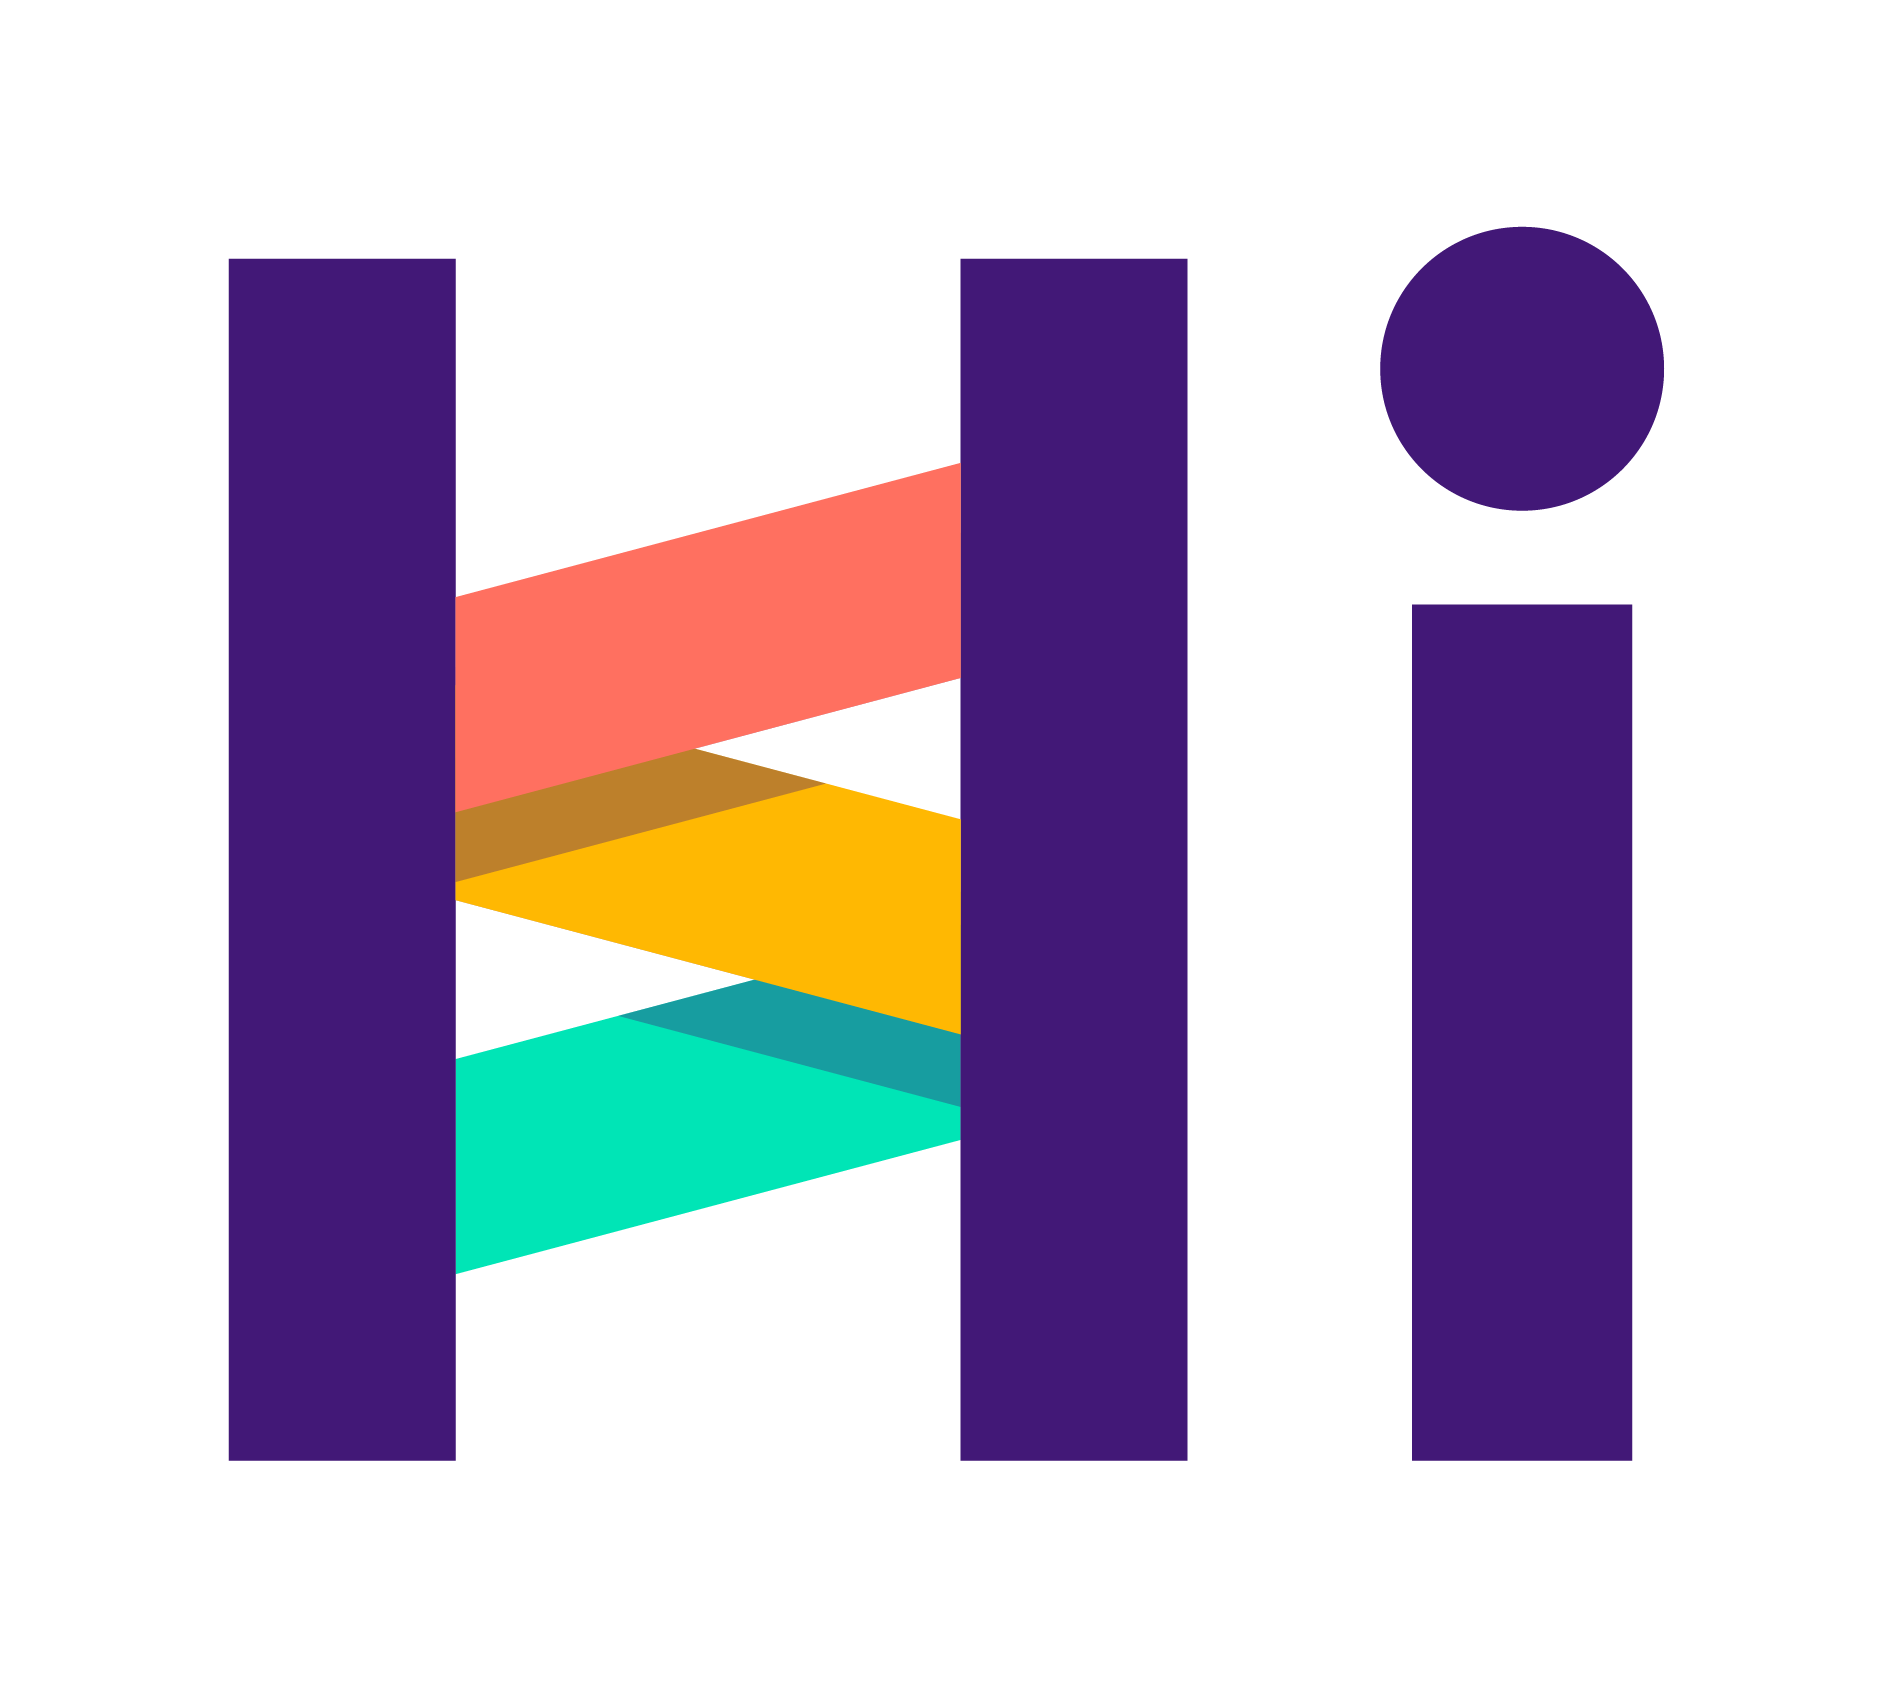

In [ ]:
import hiplot

html = hiplot.Experiment.from_dataframe(evaluation_df).to_html()
displayHTML(html)